[0. 0. 0. ... 1. 1. 1.]


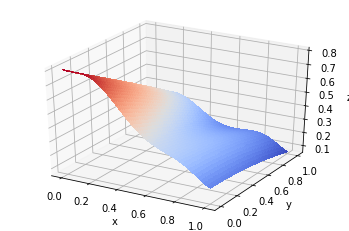

Mean squared error (ysklearn): 0.02954299693426138
R^2 score (ysklearn): 0.6412734115561595


In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

n = 1000 # 1st way = data points
#n_x = 100 # 2nd way = data points
#n_y = 100 # 2nd way = data points



error = 0.0

#x = np.random.rand(n,1) # 1st way x data values
#y = np.random.rand(n,1) # 1st way x data values


# Make data.
#xplot = np.arange(0, 1, 0.05) # 1st way grid
#yplot = np.arange(0, 1, 0.05) # 1st way grid
#xplot, yplot = np.meshgrid(xplot,yplot)

#sort_inds_xplot = np.argsort(x) # 2nd way for grid points 
#sort_inds_yplot = np.argsort(y) # 2nd way for grid points

#xplot = x[sort_inds_xplot] # 2nd way for grid
#yplot = y[sort_inds_yplot] # 2nd way for grid 



#x = np.random.rand(n_x) #2nd way x data values
XY = []
for x in np.random.rand(n):
    for y in np.random.randn(n): #2nd way y data values
        XY.append([1, x, y, x*x, y*y, x*y, x**3, y**3, x**2*y, x*y**2, x**4, y**4, x**3*y, x**2*y**2, x*y**3, x**5, y**5, 
                   x**4*y, x**3*y**2, x**2*y**3, x*y**4, np.exp(x), np.exp(y),
                   np.exp((x*x)+(y*y)), np.exp((x*x)+y)])
XY = np.asarray(XY)

x, y = XY[:, [1,2]].T


z = FrankeFunction(x.reshape(-1,1), y.reshape(-1,1))+error*np.random.randn(n*n,1)

#    XY = np.c_[np.ones(((n_x*n_y),1)), x, y, x*x, y*y]


from sklearn.linear_model import LinearRegression

clf2 = LinearRegression()
clf2.fit(XY, z)

#ols = linear_model.LinearRegression()
#ols.fit(X_train, y_train)

XYplot = []
for xplot in np.linspace(0,1,100):
    for yplot in np.linspace(0,1,100): #2nd way y data values
        XYplot.append([1, xplot, yplot, xplot**2, yplot**2, xplot*yplot, xplot**3, yplot**3, xplot**2*yplot, 
                       xplot*yplot**2, xplot**4, yplot**4, xplot**3*yplot, xplot**2*yplot**2, xplot*yplot**3, 
                       xplot**5, yplot**5, xplot**4*yplot, xplot**3*yplot**2, xplot**2*yplot**3, xplot*yplot**4,
                       np.exp(xplot), np.exp(yplot), np.exp((xplot*xplot)+(yplot*yplot)), np.exp((xplot*xplot)+yplot)])
XYplot = np.asarray(XYplot)

xplot, yplot = XYplot[:, [1,2]].T

zplot=FrankeFunction(xplot, yplot) # 1st way ztrue

#XYplot = np.c_[np.ones(((n_x*n_y),1)), xplot, xplot**2] # 1st way XYplot

zsklearn = clf2.predict(XYplot) # 1st way zresult


fig = plt.figure()
ax = fig.gca(projection='3d')
print(xplot)

# Plot the surface.
surf = ax.plot_surface(xplot.reshape(100,100), yplot.reshape(100,100), zsklearn.reshape(100,100), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

#surf = ax.scatter(xplot.reshape(10,10), yplot.reshape(10,10), zsklearn.reshape(10,10), cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)

#surf = ax.plot_surface(xplot.reshape(100,100), yplot.reshape(100,100), zplot.reshape(100,100), cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)
# 1st way true curve
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Customize the z axis.
#ax.set_zlim(-0.10, 1.40)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

from sklearn.metrics import mean_squared_error

# Note that the y values are not sorted, but ypredict and ysklearn are
# (we used Xplot to find these, not X)
# Thus, done with plotting, let us instead make new predictions based on X

#ypredict2 = X.dot(beta)
#ysklearn2 = clf2.predict(X)

# Then we find the MSE:

print("Mean squared error (ysklearn):", mean_squared_error(zplot, zsklearn))
from sklearn.metrics import r2_score

print("R^2 score (ysklearn):", r2_score(zplot, zsklearn))
